Iterations till convergence:  1


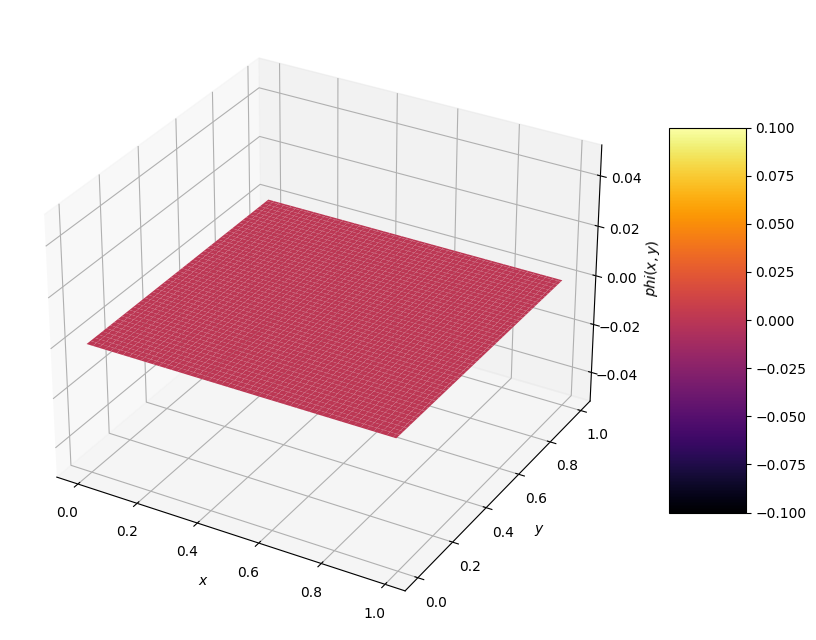

In [69]:

import numpy as np
import matplotlib.pyplot as plt
modes = 1
L_x = 1.0
L_y = 1.0
n_x = 100
n_y = 100

del_x = L_x / n_x
del_y = L_y / n_y

x = np.arange(0, L_x, del_x)
y = np.arange(0, L_y, del_y)

X, Y = np.meshgrid(x, y)

source = np.zeros([n_y, n_x])
phi = np.zeros([n_y, n_x])
source[1:-1, 1:-1] = 0
# phi(y, x)
tol = 1e-5
err = 1e10
max_cnt = 50
cntr = 0
while err > tol and cntr < max_cnt:
    phi_k = phi.copy()

    phi_k[0,:]  = 0 # Bottom
    phi_k[:,-1] = 0 # Right
    phi_k[:,0]  = 0 # Left
    #phi_k[10:-10, 10:-10] = np.sin(np.pi * x[:80])

    for itr_x in range(0, n_x - 1):
        for itr_y in range(0, n_y - 1):
            phi[itr_y, itr_x] = source[itr_y, itr_x] * ((del_x ** 2) * (del_y ** 2)) / (2 * (del_x ** 2 + del_y ** 2)) + (phi_k[itr_y, itr_x + 1] + phi_k[itr_y, itr_x - 1]) * (del_y ** 2) / (2 * (del_x ** 2 + del_y ** 2)) + (phi_k[itr_y + 1, itr_x] + phi_k[itr_y - 1, itr_x]) * (del_y ** 2) / (2 * (del_x ** 2 + del_y ** 2))
    
    diff = phi - phi_k
    err = np.linalg.norm(diff, 2)
    cntr += 1
    #print(phi)

if cntr == max_cnt:
    print("Error: ", err)
else:
    print("Iterations till convergence: ", cntr)
#plt.contourf(X, Y, phi, cmap="inferno", levels=10)
#plt.colorbar()
#plt.xlabel("X")
#plt.ylabel("Y")
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, phi, cmap='inferno')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$phi(x, y)$')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

In [60]:
source

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

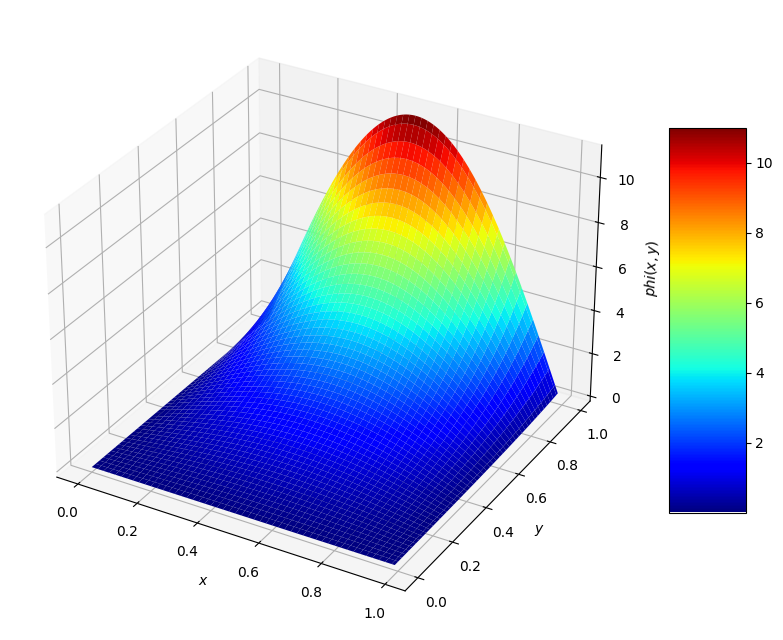

In [26]:
# From math found phi(x, y) = sin(k * np.pi * x) * sinh(k * np.pi * y)

import numpy as np
import matplotlib.pyplot as plt

L_x = 1
L_y = 1
k = 1
n_x = 100
n_y = 100
del_x = L_x / n_x
del_y = L_y / n_y
x = np.arange(0, L_x, del_x)
y = np.arange(0, L_y, del_y)

X, Y = np.meshgrid(x, y)

phi = np.sin(k * np.pi * X) * np.sinh(k * np.pi * Y)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, phi, cmap='jet')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$phi(x, y)$')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()

Text(0, 0.5, 'Y')

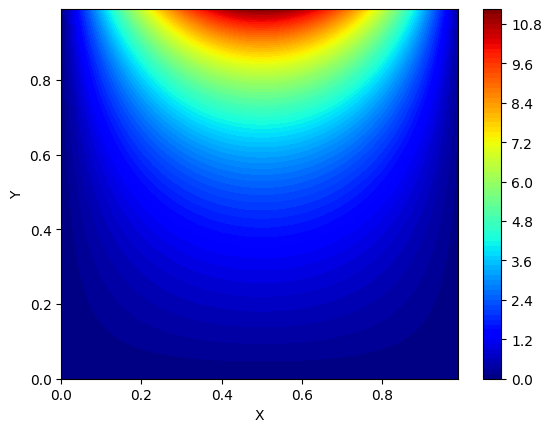

In [27]:
plt.contourf(X, Y, phi, cmap="jet", levels=100)
plt.colorbar()
plt.xlabel("X")
plt.ylabel("Y")

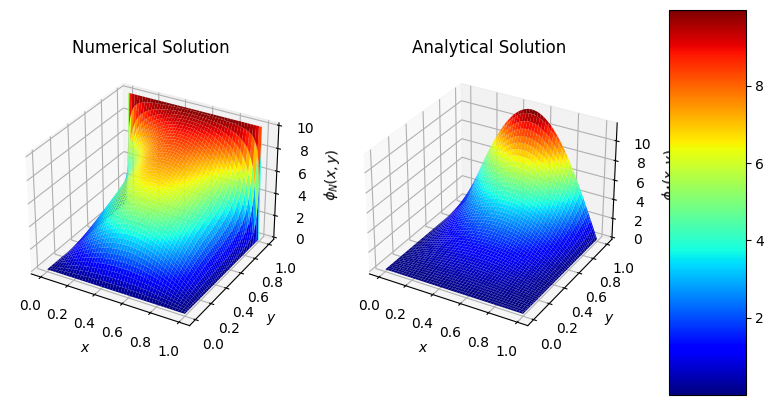

In [83]:
import numpy as np
import matplotlib.pyplot as plt

L_x = 1
L_y = 1

k = 1
n_x = 100
n_y = 100

del_x = L_x / n_x
del_y = L_y / n_y

x = np.linspace(0, L_x, n_x)
y = np.linspace(0, L_y, n_y)
X, Y = np.meshgrid(x, y)

phi_analytical = np.sin(k * np.pi * X) * np.sinh(k * np.pi * Y)

phi_numerical = np.ones_like(phi_analytical)

# constant = 1
# phi_numerical[:, 0] =constant  # Left 
# phi_numerical[:, -1] =constant # Right
# phi_numerical[0, :] =constant # Bottom
# phi_numerical[-1, :] = constant # Top


source = np.zeros_like(phi_numerical)
max_cntr = 1000
tol = 1e-5
for cntr in range(max_cntr):
        constant = 0
        phi_numerical[:, 0] =constant  # Left 
        phi_numerical[:, -1] =constant # Right
        phi_numerical[0, :] =constant # Bottom

        phi_new = np.copy(phi_numerical)
        for itr_x in range(1, n_x-1):
            for itr_y in range(1, n_y-1):
                phi_new[itr_y, itr_x] = (phi_new[itr_y, itr_x + 1] + phi_new[itr_y, itr_x - 1]) * (del_y ** 2) / (2 * (del_x ** 2 + del_y ** 2)) + (phi_new[itr_y + 1, itr_x] + phi_new[itr_y - 1, itr_x]) * (del_y ** 2) / (2 * (del_x ** 2 + del_y ** 2))
                
        if np.linalg.norm(phi_new - phi_numerical, 2) < tol:
            print(f"Converged after {cntr+1} iterations")
            break
        phi_numerical = phi_new 

#  if cntr >= max_cntr and np.linalg.norm(phi_new - phi_numerical, 2) >= tol:
#     print(f"Did not converge and error: { np.linalg.norm(phi_new - phi_numerical, 2)}")
# NUMERICAL
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(121, projection='3d')
surf1 = ax.plot_surface(X, Y, phi_numerical, cmap='jet')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$\phi_{N}(x, y)$')
ax.set_title('Numerical Solution')

# ANALYTICAL
ax = fig.add_subplot(122, projection='3d')
surf2 = ax.plot_surface(X, Y, phi_analytical, cmap='jet')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$\phi_{A}(x, y)$')
ax.set_title('Analytical Solution')

fig.colorbar(surf1, ax=fig.get_axes(), shrink=0.5, aspect=5)

plt.show()


In [55]:
np.max(phi_numerical) , np.min(phi_numerical)


(11.547285690571037, 0.0)

In [56]:
np.max(phi_analytical), np.min(phi_analytical)

(11.547285690571037, 0.0)

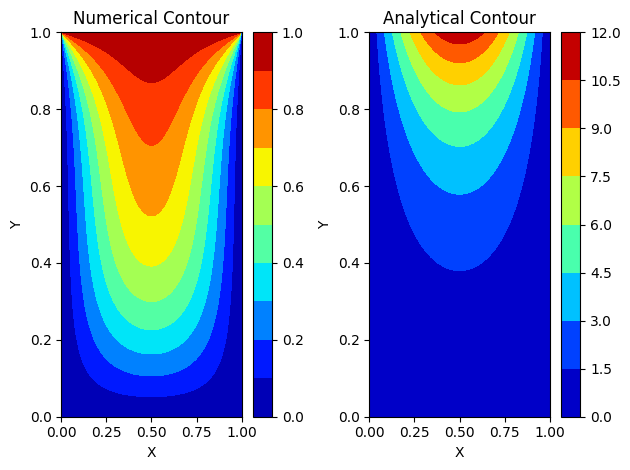

In [85]:
fig, axs = plt.subplots(1, 2)
phi_n_contour = axs[0].contourf(X, Y, phi_numerical, cmap="jet", levels=10)
axs[0].set_title("Numerical Contour")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")
fig.colorbar(phi_n_contour, ax=axs[0])

phi_a_contour = axs[1].contourf(X, Y, phi_analytical, cmap="jet", levels=10)
axs[1].set_title("Analytical Contour")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Y")
fig.colorbar(phi_a_contour, ax=axs[1])

plt.tight_layout()
plt.show()

 pMLMG->solve({&PoissonPhi}, {&PoissonRHS}, 1.e-10, -1); # Ax = b

 FerroX has a native Laplacian operator leading to the situation where the user only defines the RHS and the pointer to store the Phi variable. 

 To set the PoissonRHS it is initialized to the charge_density with the following angles being imposed:

 if(use_Euler_angles){
        R_11 = cos(alpha_rad)*cos(theta_rad) - cos(beta_rad)*sin(alpha_rad)*sin(theta_rad);  
        R_12 = sin(alpha_rad)*cos(theta_rad) + cos(beta_rad)*cos(alpha_rad)*sin(theta_rad);  
        R_13 = sin(beta_rad)*sin(theta_rad);  
        R_21 = -cos(beta_rad)*cos(theta_rad)*sin(alpha_rad) - cos(alpha_rad)*sin(theta_rad);  
        R_22 = cos(beta_rad)*cos(alpha_rad)*cos(theta_rad) - sin(alpha_rad)*sin(theta_rad);  
        R_23 = sin(beta_rad)*cos(theta_rad);  
        R_31 = sin(alpha_rad)*sin(beta_rad);  
        R_32 = -cos(alpha_rad)*sin(beta_rad);  
        R_33 = cos(beta_rad);  
    } 

    

Green's function
point charge potential and how we can derive the field from poisson (GF)
diff solve for valid non-trivial rho (GF)
scale match; numerical should hold irrespective of IC

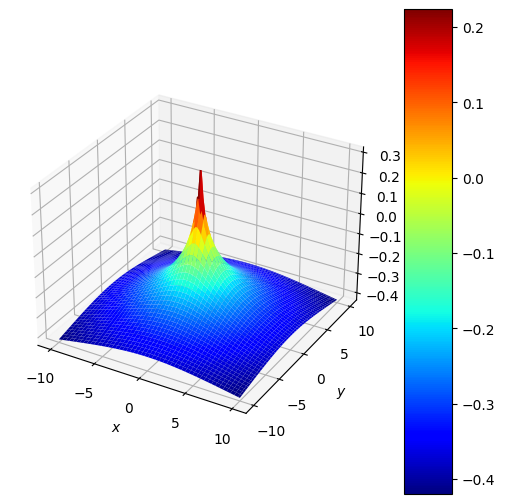

In [23]:
# 2D poisson equation with source function = 1 throughout domain for domain (10, 10)
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)
h = x[1] - x[0] #dx = dy
phi = np.zeros((len(x), len(y)))


for i in range(len(x)):
    for j in range(len(y)):

        r = np.sqrt( (x[i]) ** 2 + (y[j]) ** 2 )
        phi[i,j] = np.log(r) / (-2 *np.pi) 
# phi[:, 0] = 0
# phi[:, -1] = 0
# phi[0, :] = 0
# phi[-1, :] = 0

#phi = np.log(np.sqrt(X**2 + Y**2)) * (X ** 2 + Y ** 2) / 2
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(121, projection='3d')
surf1 = ax.plot_surface(X, Y, phi, cmap='jet')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$\phi_{N}(x, y)$')
fig.colorbar(surf1, ax=ax, shrink = 0.5, aspect=10)
plt.tight_layout() 


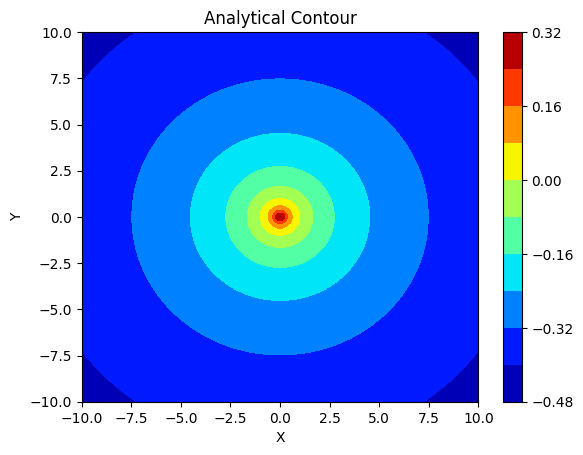

In [24]:
fig, axs = plt.subplots(1, 1)
phi_n_contour = axs.contourf(X, Y, phi, cmap="jet", levels=10)
axs.set_title("Analytical Contour")
axs.set_xlabel("X")
axs.set_ylabel("Y")
fig.colorbar(phi_n_contour, ax=axs)

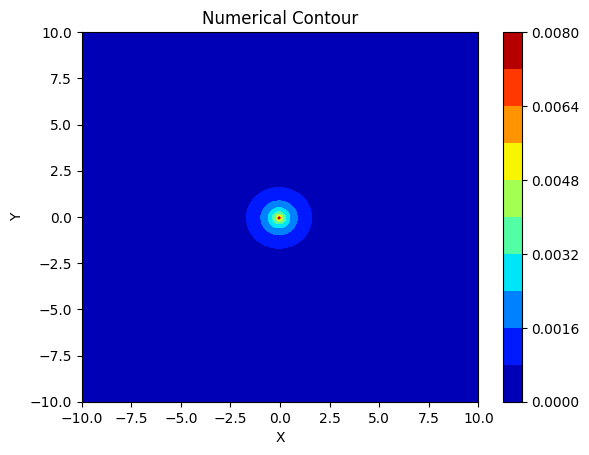

In [30]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 200) # 20 x point / 100 
y = np.linspace(-10, 10, 200)
mid = int(len(x) / 2) - 1
X, Y = np.meshgrid(x, y)

h = x[1] - x[0]
f = np.zeros((len(x), len(y)))
u = np.zeros((len(x),len(y)))

f[mid, mid] = 1


for _ in range(1000):
    u_n = u.copy()

    for i in range(1, len(x) - 1):
        for j in range(1, len(y) - 1):
            u_n[i, j] = 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1] + h**2 * f[i, j])
    u = u_n
# u[:, 0] = 0
# u[:, -1] = 0
# u[0, :] = 0
# u[-1, :] = 0
fig, axs = plt.subplots(1, 1)
phi_n_contour = axs.contourf(X, Y, u, cmap="jet", levels=10)
axs.set_title("Numerical Contour")
axs.set_xlabel("X")
axs.set_ylabel("Y")
fig.colorbar(phi_n_contour, ax=axs)

In [ ]:
fig, axs = plt.subplots(1, 1)
phi_n_contour = axs.contourf(X, Y, u, cmap="jet", levels=10)
axs.set_title("Numerical Contour")
axs.set_xlabel("X")
axs.set_ylabel("Y")
fig.colorbar(phi_n_contour, ax=axs)

In [ ]:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(121, projection='3d')
surf1 = ax.plot_surface(X, Y, u, cmap='jet')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$\phi_{N}(x, y)$')
fig.colorbar(surf1, ax=ax, shrink=0.5, aspect=5)
plt.tight_layout()